In [14]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
!pwd

/webapps/piglegsurgery/piglegcv


In [16]:
import torch
torch.cuda.is_available()

True

In [17]:
!nvidia-smi

Thu Jan 11 10:23:54 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   36C    P8     8W / 250W |   5238MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
torch.__version__

'1.12.0a0+8a1a93a'

In [19]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [20]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [21]:
# pip install mmcv-full

# Select video

In [27]:
is_microsurgery = False
test_first_seconds=False
n_stitches = 3
use_application_outputdir = False

patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
# patch = "Einzel.MOV"
patch = "test_4.mp4"; n_stitches=0
# patch = "micro_01*.mp4"
# patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"; n_stitches=5
patch = "Katharina_Einzelknopfnaht"; n_stitches=3
# patch = "Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu_"; n_stitches=0
# patch = "Good-162880einzelknopf"; n_stitches=5


img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
assert len(img_pths) == 1, img_pths
mediafile_path = img_pths[0]


# original outputdir
if use_application_outputdir:
    outputdir = list(list(Path("../piglegsurgeryweb/media/").glob(f"*/*{patch}*.zip"))[0].parent.glob("*/meta.json"))[0].parent
    outputdir = outputdir.absolute().resolve()
    outputdir
else:
    outputdir = Path("./del_test_video_output/") / mediafile_path.name

## Do whole processing together


2024-01-10 18:17:31.996 | DEBUG    | pigleg_cv:__init__:101 - ###############
2024-01-10 18:17:31.997 | DEBUG    | pigleg_cv:__init__:102 - device=cuda
2024-01-10 18:17:31.998 | DEBUG    | pigleg_cv:__init__:103 - test_first_seconds=False
2024-01-10 18:17:31.998 | DEBUG    | pigleg_cv:__init__:104 - is_microsurgery=False
2024-01-10 18:17:31.999 | DEBUG    | pigleg_cv:__init__:133 - self.is_microsurgery=False
2024-01-10 18:17:31.999 | INFO     | pigleg_cv:run:137 - CV processing started on ../piglegsurgeryweb/media/upload/20220620-103827_Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu__0123d7081df813691fd33801ee35d31d6dcdc08e/Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu_.mp4, outputdir=del_test_video_output
2024-01-10 18:17:32.000 | DEBUG    | pigleg_cv:run:140 - self.is_microsurgery=False
2024-01-10 18:17:32.000 | DEBUG    | pigleg_cv:run:141 - False, <class 'bool'>
2024-01-10 18:17:32.001 | DEBUG    | pigleg_cv:run:142 - <class 'bool'>
2024-01-10 18:17:3

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-10 18:17:35.983 | DEBUG    | incision_detection_mmdet:run_incision_detection:271 - number of detected incisions = 1
2024-01-10 18:17:35.985 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:414 - qr_data={'is_microsurgery': False, 'pix_size_method': 'weighted_average', 'is_detected': True, 'box': [[1249, 460], [1328, 463], [1334, 379], [1254, 376]], 'pix_size': 0.0003410585110105589, 'incision_bboxes': [[748.6005249023438, 673.74365234375, 1014.0221557617188, 759.0460815429688, 0.9803418517112732]], 'qr_size': 0.027, 'size_by_scene': 0.00015625, 'text': 'QR scale pigleg', 'pix_size_single_frame_detector_m': 0.0003081340628318455, 'bbox_scene_area': [279.3800048828125, 27.39600372314453, 1644.9974365234375, 1034.3681640625, 0.6593022346496582], 'bbox_micro_calibration': [], 'qr_scissors_frame_detected': False, 'qr_bboxes_SID': [[1248.8341064453125, 374.24395751953125, 1336.8321533203125, 467.3132019042969, 0.99782794713974]], 'scene_width_m': 0.6548323411402731, 'pix

Fusing layers... 
IDetect.fuse


2024-01-10 18:17:54.747 | DEBUG    | run_qr:get_bboxes:36 - saving single_image_detector result
2024-01-10 18:17:54.823 | DEBUG    | run_qr:interpret_bboxes:123 - bboxes[3]=array([[     511.69,      183.42,      559.82,      232.41,     0.99569],
       [     33.228,      24.072,      686.95,      489.35,    0.088896],
       [     20.727,      211.42,      604.32,      523.34,    0.080578],
       [     47.692,      0.4495,      672.33,      71.701,    0.056759]], dtype=float32)
2024-01-10 18:17:54.825 | DEBUG    | tools:sort_bboxes_and_masks_by_confidence:256 - sorted_indices=array([0, 1, 2]), int64
2024-01-10 18:17:54.826 | DEBUG    | run_qr:_holes_pix_sizes:75 - pix_sizes_holes=array([  0.0003399], dtype=float32)
2024-01-10 18:17:54.827 | DEBUG    | run_qr:_holes_pix_sizes:76 - pix_sizes_weights=array([    0.99786], dtype=float32)
2024-01-10 18:17:54.968 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'QR scale pigleg'
2024-01-10 18:17:54.970 | DEBUG    | r

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-10 18:17:55.765 | DEBUG    | incision_detection_mmdet:run_incision_detection:271 - number of detected incisions = 1
2024-01-10 18:17:55.767 | DEBUG    | run_perpendicular:main_perpendicular:336 - len(imgs)=1
2024-01-10 18:17:55.800 | DEBUG    | tools:save_json:17 - Writing 'del_test_video_output/perpendicular_0.json'
2024-01-10 18:17:55.801 | DEBUG    | tools:save_json:26 - old keys: ['intersections', 'alphas']
2024-01-10 18:17:55.803 | DEBUG    | tools:save_json:28 - updated keys: ['intersections', 'alphas']
2024-01-10 18:17:56.054 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:53 - cfg_path=PosixPath('stitch_detection_mmdet_config.py'), True
2024-01-10 18:17:56.055 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:54 - checkpoint_path=PosixPath('/webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth'), True


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2024-01-10 18:17:56.770 | DEBUG    | tools:save_json:17 - Writing 'del_test_video_output/stitch_detection_0.json'
2024-01-10 18:17:56.772 | DEBUG    | tools:save_json:26 - old keys: ['stitch_labels', 'stitch_bboxes']
2024-01-10 18:17:56.772 | DEBUG    | tools:save_json:28 - updated keys: ['stitch_labels', 'stitch_bboxes']
2024-01-10 18:17:56.774 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:106 - number of detected stitches = 3
2024-01-10 18:17:56.774 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:107 - Stitch detection finished, boxes in: del_test_video_output/stitch_detection_0.json
2024-01-10 18:17:56.841 | DEBUG    | stitch_detection_mmdet:run_stitch_analyser:187 - R-squared upper line: 0.044
2024-01-10 18:17:5

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2024-01-10 18:18:05,013 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2024-01-10 18:18:05,036 - mmtrack - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2024-01-10 18:18:05,037 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-10 18:18:05,037 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-10 18:18:05,272 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, the shape in current model is torch.Size([5, 320, 1, 

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth


2024-01-10 18:18:05.950 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 0, 0.00% (0.02s elapsed, 1000.00s remaining)


The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1_1_main_conv_bn_running_var, ema_detector_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_detector_ba

2024-01-10 18:18:15.832 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 50, 1.10% (9.90s elapsed, 887.55s remaining)
2024-01-10 18:18:25.632 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 100, 2.21% (19.70s elapsed, 873.16s remaining)
2024-01-10 18:18:35.428 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 150, 3.31% (29.50s elapsed, 861.72s remaining)
2024-01-10 18:18:45.582 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 200, 4.41% (39.65s elapsed, 858.86s remaining)
2024-01-10 18:18:55.853 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 250, 5.52% (49.92s elapsed, 855.08s remaining)
2024-01-10 18:19:06.166 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 300, 6.62% (60.24s elapsed, 849.72s remaining)
2024-01-10 18:19:16.506 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:15

6177.451394867152


2024-01-10 18:33:45.295 | DEBUG    | tools:save_json:17 - Writing 'del_test_video_output/tracks_points.json'
2024-01-10 18:33:45.296 | DEBUG    | tools:save_json:28 - updated keys: ['frame_ids', 'data_pixels']
2024-01-10 18:33:45.394 | DEBUG    | run_report:create_video_report_figure:536 - cut_frames=[]
2024-01-10 18:33:45.395 | DEBUG    | run_report:create_video_report_figure:537 - object_names=['Needle holder', 'Forceps', 'Scissors', 'Scissors']
2024-01-10 18:33:45.396 | DEBUG    | run_report:create_video_report_figure:538 - object_colors=['b', 'r', 'g', 'g']
2024-01-10 18:33:45.419 | DEBUG    | run_report:create_video_report_figure:567 - object_name='Needle holder', len(frame_ids_per_class)=3939, len(data_pixel_per_class)=3939
2024-01-10 18:33:45.424 | DEBUG    | run_report:create_video_report_figure:604 - object_color='b', object_name='Needle holder'
2024-01-10 18:33:45.425 | DEBUG    | run_report:create_video_report_figure:567 - object_name='Forceps', len(frame_ids_per_class)=2724

bbox
[178.07186889648438, 318.7276916503906, 456.7616882324219, 407.3918762207031, 0.9958047270774841]


/home/appuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2024-01-10 18:37:17.403 | DEBUG    | run_report:main_report:1238 - per stitch analysis object_full_name='Forceps' frame_idx_start=0 frame_idx_stop=2724
2024-01-10 18:37:17.637 | DEBUG    | run_report:create_pdf_report_for_one_tool:332 - main_report: figures del_test_video_output/graph_1c_forceps_trajectory_all.jpg is saved
2024-01-10 18:37:17.817 | DEBUG    | run_report:create_pdf_report_for_one_tool:361 - main_report: figures del_test_video_output/fig_1a_forceps_graph_all.jpg is saved
2024-01-10 18:37:17.838 | DEBUG    | run_report:create_heatmap_report_plt:171 - points.shape=(2724, 2)
/home/appuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2024-01-10 18:37:19.445 | DEBUG    | run_report:main_rep

main_report: Video file del_test_video_output/__cropped.mp4 is processed!


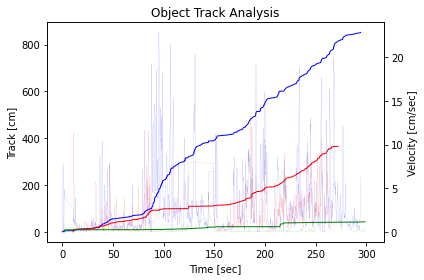

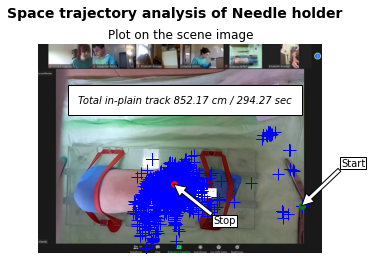

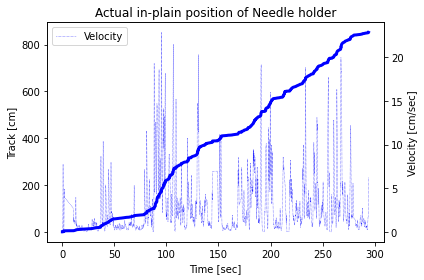

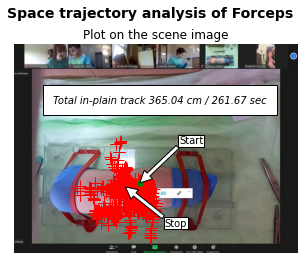

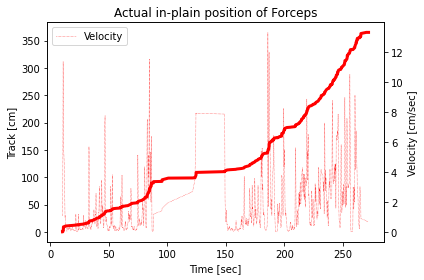

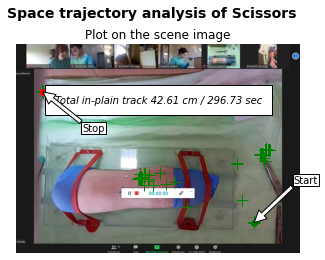

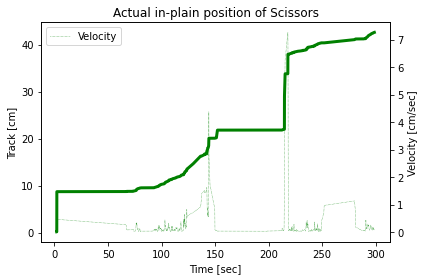

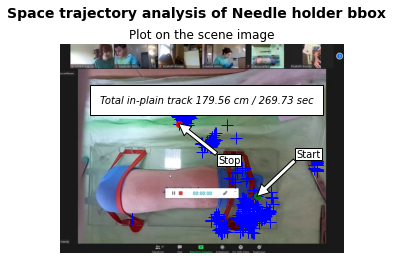

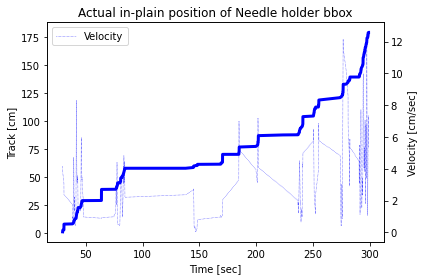

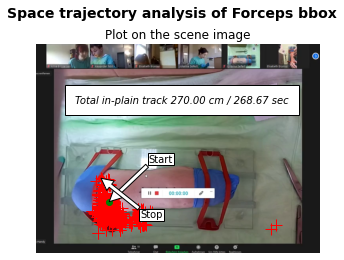

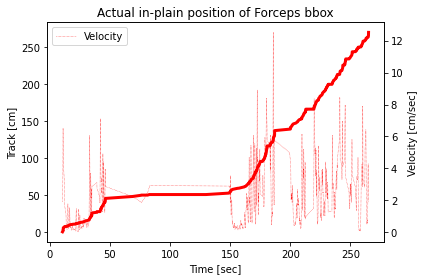

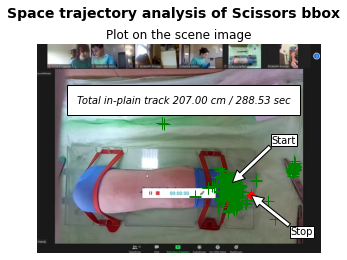

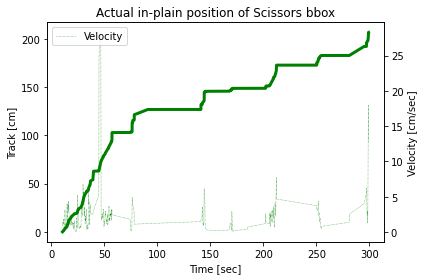

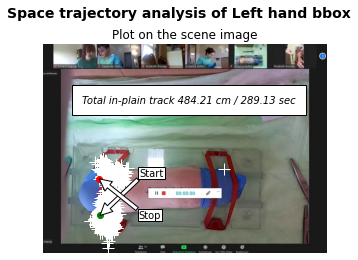

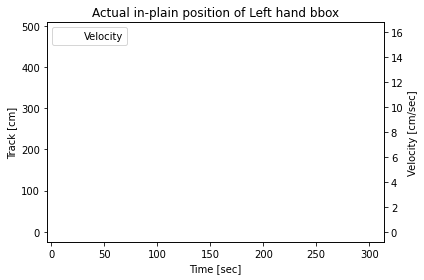

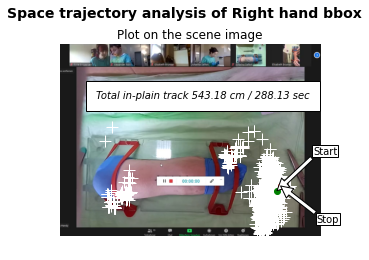

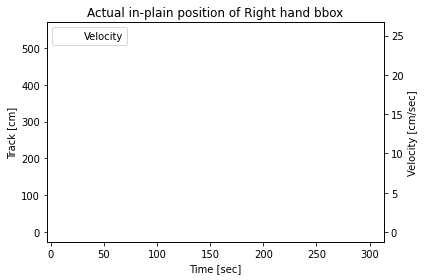

In [11]:
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
dcv.run()

In [12]:
# report_data = dcv.make_report()

In [37]:
dcv._find_stitch_ends_in_tracks(n_clusters= n_stitches, plot_clusters=True)

[]

splits_s=[79.82, 142.33333333333331]
splits_frames=[1197, 2134]


/home/appuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


([5.0,
  64.66666666666667,
  86.26666666666667,
  141.93333333333334,
  142.66666666666666,
  228.53333333333333],
 [75, 970, 1294, 2129, 2140, 3428])

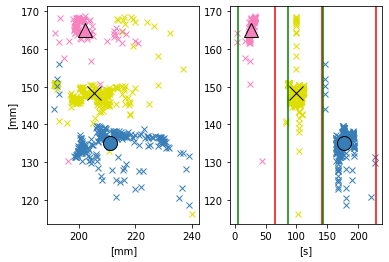

In [59]:
pigleg_cv.find_stitch_ends_in_tracks(outputdir,n_clusters= n_stitches, plot_clusters=True)